In [86]:
#pip install seaborn

  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached scipy-1.6.0-cp38-cp38-macosx_10_9_x86_64.whl (30.7 MB)
Note: you may need to restart the kernel to use updated packages.


In [90]:
#pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.1-cp38-cp38-macosx_10_13_x86_64.whl (7.2 MB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression

In [2]:
schools_df = pd.read_csv('../data/school_df_v3.csv')

In [37]:
schools_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 53 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   school_sector                             116 non-null    object 
 1   school_code                               116 non-null    int64  
 2   school_name                               116 non-null    object 
 3   school_grade_range                        116 non-null    object 
 4   school_enrollment_SY1819                  116 non-null    float64
 5   school_star_score_SY1819                  109 non-null    float64
 6   school_star_rating_SY1819                 109 non-null    float64
 7   school_capacity_SY1819                    108 non-null    float64
 8   school_unfilled_seats_SY1819              108 non-null    float64
 9   school_latitude                           116 non-null    float64
 10  school_longitude                      

In [3]:
schools_df.head()

,school_sector,school_code,school_name,school_grade_range,school_enrollment_SY1819,school_star_score_SY1819,school_star_rating_SY1819,school_capacity_SY1819,school_unfilled_seats_SY1819,school_latitude,...,pct_of_absences_20+_SY1819,pct_of_student_absences_20+_SY1819,pct_of_absences_1-5_SY1718,pct_of_absences_6-10_SY1718,pct_of_absences_11-20_SY1718,pct_of_absences_20+_SY1718,pct_of_student_absences_1-5_SY1718,pct_of_student_absences_6-10_SY1718,pct_of_student_absences_11-20_SY1718,pct_of_student_absences_20+_SY1718
0,DCPS,202,Aiton Elementary School,PK3-5th,244.0,10.79,1.0,529.0,285.0,38.897002,...,0.113514,0.086066,0.418079,0.327684,0.186441,0.067797,0.304527,0.238683,0.135802,0.049383
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,339.0,48.54,3.0,400.0,61.0,38.879515,...,0.037453,0.029499,0.505085,0.332203,0.122034,0.040678,0.424501,0.279202,0.102564,0.034188
2,DCPS,450,Anacostia High School,9th-12th,296.0,3.68,1.0,837.0,541.0,38.870084,...,0.653846,0.746622,0.079082,0.102041,0.150510,0.668367,0.081794,0.105541,0.155673,0.691293
3,DCPS,452,Ballou High School,9th-12th,650.0,4.83,1.0,NaN,NaN,38.838512,...,0.764012,0.796923,0.057734,0.111111,0.225490,0.605664,0.060227,0.115909,0.235227,0.631818
4,DCPS,462,Ballou STAY,Adult,524.0,NaN,NaN,NaN,NaN,38.838512,...,0.880240,0.280534,0.034965,0.034965,0.034965,0.895105,0.010101,0.010101,0.010101,0.258586


In [12]:
cluster_df = pd.read_csv('../data/cluster_student_counts.csv')

In [13]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Neighborhood Cluster                                         75 non-null     object 
 1   Neighborhood Cluster Names                                   75 non-null     object 
 2   School Year_x                                                75 non-null     object 
 3   Count of English Learner Students                            75 non-null     object 
 4   English Learner Students as  share of Neighborhood Cluster   75 non-null     object 
 5   Count of At Risk Students                                    75 non-null     int64  
 6   At Risk as share of Neighborhood Cluster                     75 non-null     float64
 7   Count of Special Education Students                          75 non-null     objec

In [15]:
cluster_1718 = cluster_df[cluster_df['School Year_x'] == 'SY17-18']
cluster_1718.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 11 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Neighborhood Cluster                                         37 non-null     object 
 1   Neighborhood Cluster Names                                   37 non-null     object 
 2   School Year_x                                                37 non-null     object 
 3   Count of English Learner Students                            37 non-null     object 
 4   English Learner Students as  share of Neighborhood Cluster   37 non-null     object 
 5   Count of At Risk Students                                    37 non-null     int64  
 6   At Risk as share of Neighborhood Cluster                     37 non-null     float64
 7   Count of Special Education Students                          37 non-null     objec

In [24]:
cluster_1718['cluster_num'] = np.nan
for i in range(len(cluster_1718)):
    cluster_1718['cluster_num'][i] = cluster_1718['Neighborhood Cluster'][i][-2:]
cluster_1718['cluster_num']

<ipython-input-24-0b93c793498e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1718['cluster_num'] = np.nan
<ipython-input-24-0b93c793498e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1718['cluster_num'][i] = cluster_1718['Neighborhood Cluster'][i][-2:]
/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3427: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

0      1.0
1     10.0
2     11.0
3     12.0
4     13.0
5     14.0
6     15.0
7     16.0
8     17.0
9     18.0
10    19.0
11     2.0
12    20.0
13    21.0
14    22.0
15    23.0
16    24.0
17    25.0
18    26.0
19    27.0
20    28.0
21     3.0
22    30.0
23    31.0
24    32.0
25    33.0
26    34.0
27    36.0
28    37.0
29    38.0
30    39.0
31     4.0
32     5.0
33     6.0
34     7.0
35     8.0
36     9.0
Name: cluster_num, dtype: float64

In [41]:
schools_df['school_cluster'][-2:]

114    Cluster 31
115    Cluster 23
Name: school_cluster, dtype: object

In [42]:
cluster_1718['Neighborhood Cluster']

0      Cluster 1
1     Cluster 10
2     Cluster 11
3     Cluster 12
4     Cluster 13
5     Cluster 14
6     Cluster 15
7     Cluster 16
8     Cluster 17
9     Cluster 18
10    Cluster 19
11     Cluster 2
12    Cluster 20
13    Cluster 21
14    Cluster 22
15    Cluster 23
16    Cluster 24
17    Cluster 25
18    Cluster 26
19    Cluster 27
20    Cluster 28
21     Cluster 3
22    Cluster 30
23    Cluster 31
24    Cluster 32
25    Cluster 33
26    Cluster 34
27    Cluster 36
28    Cluster 37
29    Cluster 38
30    Cluster 39
31     Cluster 4
32     Cluster 5
33     Cluster 6
34     Cluster 7
35     Cluster 8
36     Cluster 9
Name: Neighborhood Cluster, dtype: object

In [46]:
schools_df.iloc[i]

school_sector                                                                             DCPS
school_code                                                                                202
school_name                                                            Aiton Elementary School
school_grade_range                                                                     PK3-5th
school_enrollment_SY1819                                                                 244.0
school_star_score_SY1819                                                                 10.79
school_star_rating_SY1819                                                                  1.0
school_capacity_SY1819                                                                   529.0
school_unfilled_seats_SY1819                                                             285.0
school_latitude                                                                      38.897002
school_longitude                                  

In [58]:
range(len(cluster_1718))

range(0, 37)

In [76]:
schools_df['cluster_Count of English Learner Students'] = 0
schools_df['cluster_English Learner Students as  share of Neighborhood Cluster'] = 0
schools_df['cluster_Count of At Risk Students'] = 0
schools_df['cluster_At Risk as share of Neighborhood Cluster'] = 0
schools_df['cluster_Count of Special Education Students'] = 0
schools_df['cluster_Special Education Students as share of Neighborhood Cluster'] = 0
schools_df['cluster_Sum of Enrollment by Sector and Grade Band'] = 0

for i in range(len(schools_df)):
    for j in range(len(cluster_1718)):
        if schools_df.iloc[i]['school_cluster'] == cluster_1718.iloc[j]['Neighborhood Cluster']:
            #print("Found One!")
            schools_df['cluster_Count of English Learner Students'][i] = cluster_1718.iloc[j]['Count of English Learner Students']
            schools_df['cluster_English Learner Students as  share of Neighborhood Cluster'][i] =cluster_1718.iloc[j]['English Learner Students as  share of Neighborhood Cluster']
            schools_df['cluster_Count of At Risk Students'][i] =cluster_1718.iloc[j]['Count of At Risk Students']
            schools_df['cluster_At Risk as share of Neighborhood Cluster'][i] =cluster_1718.iloc[j]['At Risk as share of Neighborhood Cluster']*100.0
            schools_df['cluster_Count of Special Education Students'][i] =cluster_1718.iloc[j]['Count of Special Education Students']
            schools_df['cluster_Special Education Students as share of Neighborhood Cluster'][i] =cluster_1718.iloc[j]['Special Education Students as share of Neighborhood Cluster']
            schools_df['cluster_Sum of Enrollment by Sector and Grade Band'][i] = cluster_1718.iloc[j]['Sum of Enrollment by Sector and Grade Band']
            #print(schools_df.iloc[i]['school_cluster'])
            #print(i)
            #print(j)
            #print(schools_df.iloc[i]['cluster_Sum of Enrollment by Sector and Grade Band'])
    

<ipython-input-76-cbe69f833f39>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schools_df['cluster_Count of English Learner Students'][i] = cluster_1718.iloc[j]['Count of English Learner Students']
<ipython-input-76-cbe69f833f39>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  schools_df['cluster_English Learner Students as  share of Neighborhood Cluster'][i] =cluster_1718.iloc[j]['English Learner Students as  share of Neighborhood Cluster']
<ipython-input-76-cbe69f833f39>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://p

In [74]:
schools_df['cluster_Sum of Enrollment by Sector and Grade Band']

0      3518
1       969
2      1786
3      9122
4      9122
       ... 
111    3453
112    4456
113    4041
114    3518
115    3453
Name: cluster_Sum of Enrollment by Sector and Grade Band, Length: 116, dtype: int64

In [79]:
#Have to divide by 100 after we multiplied by 100, it was not finding these values when running the loop before:
schools_df['cluster_At Risk as share of Neighborhood Cluster'] = schools_df['cluster_At Risk as share of Neighborhood Cluster']/100.0

In [80]:
schools_df.head()

,school_sector,school_code,school_name,school_grade_range,school_enrollment_SY1819,school_star_score_SY1819,school_star_rating_SY1819,school_capacity_SY1819,school_unfilled_seats_SY1819,school_latitude,...,pct_of_student_absences_6-10_SY1718,pct_of_student_absences_11-20_SY1718,pct_of_student_absences_20+_SY1718,cluster_Count of English Learner Students,cluster_English Learner Students as share of Neighborhood Cluster,cluster_Count of At Risk Students,cluster_At Risk as share of Neighborhood Cluster,cluster_Count of Special Education Students,cluster_Special Education Students as share of Neighborhood Cluster,cluster_Sum of Enrollment by Sector and Grade Band
0,DCPS,202,Aiton Elementary School,PK3-5th,244.0,10.79,1.0,529.0,285.0,38.897002,...,0.238683,0.135802,0.049383,71,0.02,2089,0.61,612,0.18,3518
1,DCPS,203,Amidon-Bowen Elementary School,PK3-5th,339.0,48.54,3.0,400.0,61.0,38.879515,...,0.279202,0.102564,0.034188,35,0.03,631,0.59,204,0.19,969
2,DCPS,450,Anacostia High School,9th-12th,296.0,3.68,1.0,837.0,541.0,38.870084,...,0.105541,0.155673,0.691293,47,0.02,1682,0.56,483,0.16,1786
3,DCPS,452,Ballou High School,9th-12th,650.0,4.83,1.0,NaN,NaN,38.838512,...,0.115909,0.235227,0.631818,66,0.01,5609,0.68,1443,0.17,9122
4,DCPS,462,Ballou STAY,Adult,524.0,NaN,NaN,NaN,NaN,38.838512,...,0.010101,0.010101,0.258586,66,0.01,5609,0.68,1443,0.17,9122


In [50]:
schools_df['cluster_Count of At Risk Students'].value_counts()

0    116
Name: cluster_Count of At Risk Students, dtype: int64

In [81]:
schools_df.columns

Index(['school_sector', 'school_code', 'school_name', 'school_grade_range',
       'school_enrollment_SY1819', 'school_star_score_SY1819',
       'school_star_rating_SY1819', 'school_capacity_SY1819',
       'school_unfilled_seats_SY1819', 'school_latitude', 'school_longitude',
       'school_cluster', 'school_ward', 'school_grade_band',
       'school_enrollment_SY1718', 'school_star_score_SY1718',
       'school_star_rating_SY1718', 'school_capacity_SY1718',
       'school_unfilled_seats_SY1718',
       'attnd_count_truancy_aged_students_SY1819', 'attnd_absence_1-5_SY1819',
       'attnd_absence_6-10_SY1819', 'attnd_absence_11-20_SY1819',
       'attnd_absence_20+_SY1819', 'attnd_count_truancy_aged_students_SY1718',
       'attnd_absence_1-5_SY1718', 'attnd_absence_6-10_SY1718',
       'attnd_absence_11-20_SY1718', 'attnd_absence_20+_SY1718',
       'school_budgeted_amount_FY16', 'school_budgeted_enrollment_FY16',
       'school_budgeted_amount_FY17', 'school_budgeted_enrollment_FY17

In [83]:
schools_df.to_csv('../data/schools_w_cluster_data.csv')

In [20]:
cluster_1718['Neighborhood Cluster'][0][-2:]

' 1'

In [84]:
#Try for the 17/18 star rating first:
X = schools_df[['school_grade_range', 'school_enrollment_SY1718', 'school_capacity_SY1718', 'school_unfilled_seats_SY1718','attnd_count_truancy_aged_students_SY1718',
        'attnd_absence_1-5_SY1718', 'attnd_absence_6-10_SY1718',
        'attnd_absence_11-20_SY1718', 'attnd_absence_20+_SY1718',
        'school_budgeted_amount_FY16', 'school_budgeted_enrollment_FY16', 
        'school_capacity_pct_SY1718', 'students_with_absences_SY1718', 
        'pct_of_absences_1-5_SY1718', 'pct_of_absences_6-10_SY1718',
        'pct_of_absences_11-20_SY1718', 'pct_of_absences_20+_SY1718',
        'pct_of_student_absences_1-5_SY1718',
        'pct_of_student_absences_6-10_SY1718',
        'pct_of_student_absences_11-20_SY1718',
        'pct_of_student_absences_20+_SY1718',
        'cluster_Count of English Learner Students',
        'cluster_English Learner Students as  share of Neighborhood Cluster',
        'cluster_Count of At Risk Students',
        'cluster_At Risk as share of Neighborhood Cluster',
        'cluster_Count of Special Education Students',
        'cluster_Special Education Students as share of Neighborhood Cluster',
        'cluster_Sum of Enrollment by Sector and Grade Band']]
y = schools_df['school_star_rating_SY1718']

In [92]:
y

0      3.0
1      2.0
2      1.0
3      1.0
4      NaN
      ... 
111    3.0
112    3.0
113    4.0
114    2.0
115    NaN
Name: school_star_rating_SY1718, Length: 116, dtype: float64

In [94]:
y.fillna(-1, inplace=True)

In [95]:
X.isna().sum()

school_grade_range                                                     0
school_enrollment_SY1718                                               1
school_capacity_SY1718                                                 9
school_unfilled_seats_SY1718                                           9
attnd_count_truancy_aged_students_SY1718                               4
attnd_absence_1-5_SY1718                                               4
attnd_absence_6-10_SY1718                                              4
attnd_absence_11-20_SY1718                                             4
attnd_absence_20+_SY1718                                               4
school_budgeted_amount_FY16                                            6
school_budgeted_enrollment_FY16                                        6
school_capacity_pct_SY1718                                             9
students_with_absences_SY1718                                          4
pct_of_absences_1-5_SY1718                         

In [98]:
X.fillna(0, inplace=True)

/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [100]:
X.isna().sum()

school_grade_range                                                     0
school_enrollment_SY1718                                               0
school_capacity_SY1718                                                 0
school_unfilled_seats_SY1718                                           0
attnd_count_truancy_aged_students_SY1718                               0
attnd_absence_1-5_SY1718                                               0
attnd_absence_6-10_SY1718                                              0
attnd_absence_11-20_SY1718                                             0
attnd_absence_20+_SY1718                                               0
school_budgeted_amount_FY16                                            0
school_budgeted_enrollment_FY16                                        0
school_capacity_pct_SY1718                                             0
students_with_absences_SY1718                                          0
pct_of_absences_1-5_SY1718                         

In [101]:
sscaler = StandardScaler()

In [104]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 28 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   school_grade_range                                                   116 non-null    object 
 1   school_enrollment_SY1718                                             116 non-null    float64
 2   school_capacity_SY1718                                               116 non-null    float64
 3   school_unfilled_seats_SY1718                                         116 non-null    float64
 4   attnd_count_truancy_aged_students_SY1718                             116 non-null    float64
 5   attnd_absence_1-5_SY1718                                             116 non-null    float64
 6   attnd_absence_6-10_SY1718                                            116 non-null    float64
 7   attnd_ab

In [105]:
X['school_grade_range'].unique()

array(['PK3-5th', '9th-12th', 'Adult', 'PK3-8th', '6th-8th', '6th-12th',
       'PK4-5th', 'Alternative', '4th-8th', 'PK4-3rd', 'PK3-KG', 'SPED',
       '9th-11th', 'PK3-3rd', '1st-5th'], dtype=object)

In [114]:
pip install category_encoders

     |████████████████████████████████| 80 kB 5.3 MB/s eta 0:00:01
  Using cached patsy-0.5.1-py2.py3-none-any.whl (231 kB)
     |████████████████████████████████| 9.5 MB 7.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [115]:
from category_encoders import OneHotEncoder

In [116]:
ohe = OneHotEncoder()

In [118]:
X['school_grade_range'] = pd.DataFrame(ohe.fit_transform(X[['school_grade_range']]))

/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
<ipython-input-118-d67ada1a95c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['school_grade_range'] = pd.DataFrame(ohe.fit_transform(X[['school_grade_range']]))


In [123]:
X.replace('N<10', 5, inplace=True)

/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/pandas/core/frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [124]:
X['cluster_Count of Special Education Students'] = pd.to_numeric(X['cluster_Count of Special Education Students'])

<ipython-input-124-e86fed8e648b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_Count of Special Education Students'] = pd.to_numeric(X['cluster_Count of Special Education Students'])


In [125]:
X['cluster_Special Education Students as share of Neighborhood Cluster'] = pd.to_numeric(X['cluster_Special Education Students as share of Neighborhood Cluster'])

<ipython-input-125-566d978c1aa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_Special Education Students as share of Neighborhood Cluster'] = pd.to_numeric(X['cluster_Special Education Students as share of Neighborhood Cluster'])


In [140]:
#The infinities should be 0s
X.replace([np.inf, -np.inf, np.nan], 0, inplace=True)

/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/pandas/core/frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [136]:
#Replacing with 5 since the value was originally N<10, so we are assuming 5:
X.replace(np.nan, 5, inplace=True)

/Users/Keith/miniconda3/envs/sql/lib/python3.8/site-packages/pandas/core/frame.py:4521: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [141]:
X_scaled = sscaler.fit_transform(X)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify = y)

In [143]:
pca = PCA()

In [144]:
X_train_pcad = pca.fit_transform(X_train)

In [147]:
X_test_pcad = pca.transform(X_test)

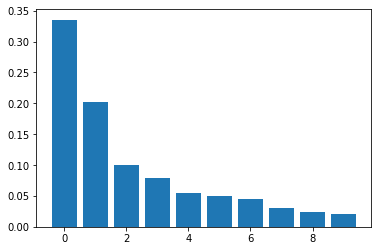

In [165]:
plt.bar(range(10), pca.explained_variance_ratio_[:10]);

In [148]:
#Now we make a linear regression with our PCA variables:
lr = LinearRegression()
lr.fit(X_train_pcad, y_train)

LinearRegression()

In [149]:
print(f'Training Score: {lr.score(X_train_pcad, y_train)}')
print(f'Test Score: {lr.score(X_test_pcad, y_test)}')

Training Score: 0.7934022884836776
Test Score: -28.217410092839657


In [162]:
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score

In [153]:
preds = lr.predict(X_test_pcad)

In [159]:
rounded = np.round(lr.predict(X_test_pcad))

In [160]:
mean_absolute_error(y_test, rounded)

2.4482758620689653

In [163]:
accuracy_score(y_test, rounded)

0.3448275862068966

In [164]:
r2_score(y_test, rounded)

-28.13809523809524

In [155]:
train_preds = lr.predict(X_train_pcad)

In [166]:
schools_df['school_budgeted_amount_FY16']

0      7.429920e+06
1      8.979878e+06
2      1.853702e+07
3      2.187321e+07
4      5.708080e+06
           ...     
111    1.076722e+07
112    1.089338e+07
113    3.121819e+07
114    1.638126e+07
115    3.331628e+06
Name: school_budgeted_amount_FY16, Length: 116, dtype: float64

In [181]:
#Test out different Xs:
X2 = schools_df['school_budgeted_amount_FY16'].fillna(0)

In [187]:
X3 = schools_df[['school_budgeted_amount_FY16','school_budgeted_amount_FY17']].fillna(0)

In [188]:
lr2 = LinearRegression()

In [189]:
Xtr2, Xte2, ytr2, yte2 = train_test_split(X3, y)

In [190]:
lr2.fit(Xtr2, ytr2)

LinearRegression()

In [191]:
lr2.score(Xtr2, ytr2)

0.12628722937965053

In [192]:
lr2.score(Xte2, yte2)

-0.4936259917766621